In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data generation

In [ ]:
def gen_data():
  data_height_low = np.random.randint(low=-50, high=0, size=5)
  data_weight_low = np.random.randint(low=-50, high=0, size=5)
  data_age_low = np.random.randint(low=-20, high=0, size=5)

  data_height_high = np.random.randint(low=250, high=350, size=4)
  data_height_high_ultra = np.random.randint(low=272, high=500, size=1)
  data_weight_high = np.random.randint(low=210, high=400, size=3)
  data_weight_high_ultra = np.random.randint(low=610, high=1000, size=2)
  data_age_high = np.random.randint(low=100, high=150, size=4)
  data_age_high_ultra = np.random.randint(low=120, high=200, size=1)

  data_height_norm = np.random.randint(low=0, high=230, size=50)
  data_weight_norm = np.random.randint(low=0, high=200, size=50)
  data_age_norm = np.random.randint(low=0, high=110, size=50)

  data_height = np.concatenate([data_height_norm, data_height_low, data_height_high, data_height_high_ultra])
  data_weight = np.concatenate([data_weight_norm, data_weight_low, data_weight_high, data_weight_high_ultra])
  data_age = np.concatenate([data_age_norm, data_age_low, data_age_high, data_age_high_ultra])
  np.random.shuffle(data_height)
  np.random.shuffle(data_weight)
  np.random.shuffle(data_age)

  return pd.DataFrame({'Height': data_height,
                     'Weight': data_weight,
                     'Age': data_age})

## Некорректные данные

In [ ]:
data = gen_data()
data.sample(5)

,Height,Weight,Age
9,29,-33,94
58,89,-37,-18
46,142,103,112
7,83,12,108
39,10,137,6


In [ ]:
data_back = data

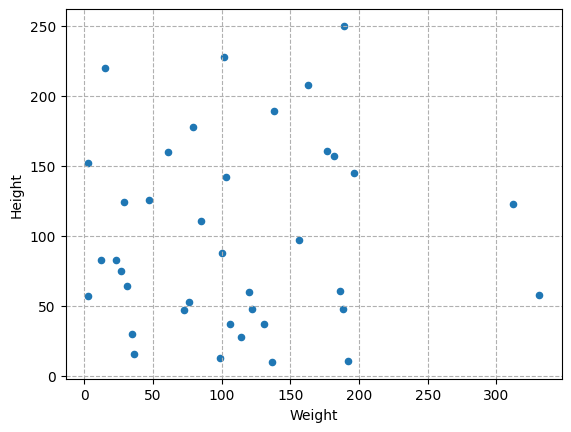

In [ ]:
data.plot.scatter(x = 'Weight', y = 'Height')
plt.grid(True, linestyle='--')

In [ ]:
data = data[(data.Height > 0) & (data.Weight > 0) & (data.Age > 0)]

In [ ]:
data = data[data.Weight < 610]
data = data[data.Height < 251]
data = data[data.Age < 120]

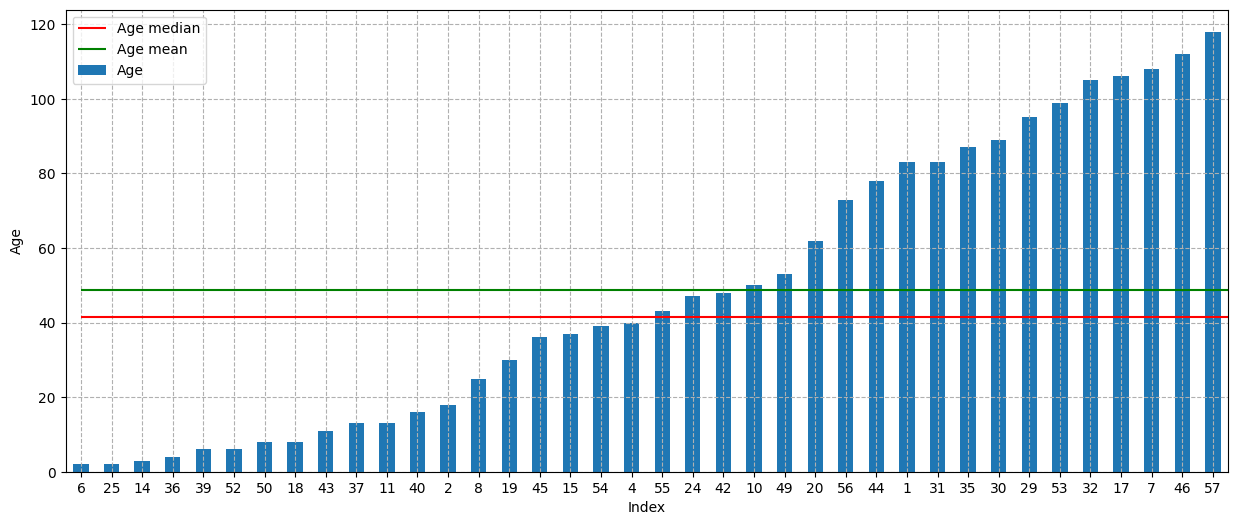

In [ ]:
data1 = data.sort_values('Age')

data1.plot(y='Age', kind='bar', legend=False, rot=0, figsize=(15,6), grid=True)
plt.hlines(data1.Age.median(), 0, 60, color='red')
plt.hlines(data1.Age.mean(), 0, 60, color='green')
plt.grid(linestyle='--')
plt.ylabel('Age')
plt.xlabel('Index')
plt.legend(['Age median', 'Age mean', 'Age'])

## Выбросы

In [ ]:
data['Age'].mode()


,Age
0,2
1,6
2,8
3,13
4,83


Text(0.5, 0, 'Index')

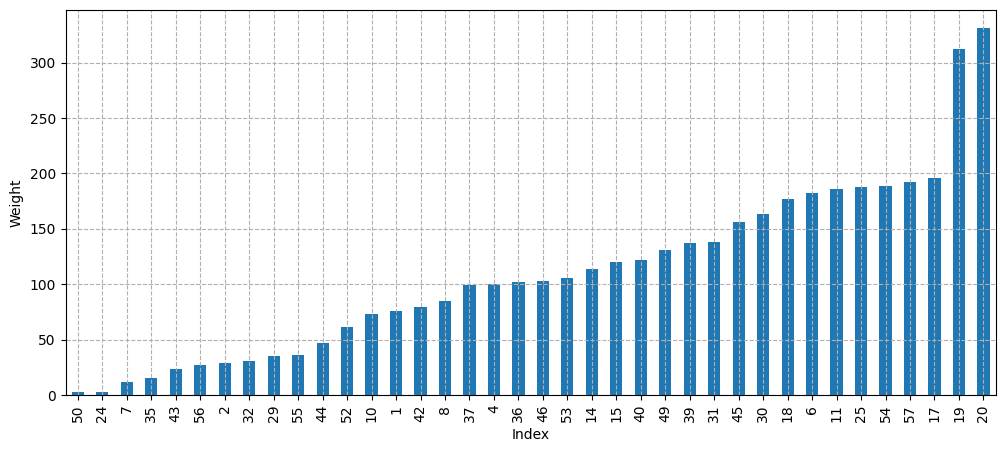

In [ ]:
data.sort_values('Weight', inplace=True)
data.plot(y='Weight', kind='bar', legend=False, figsize=(12,5))
plt.grid(linestyle='--')
plt.ylabel('Weight')
plt.xlabel('Index')

In [ ]:
data.Age.median()

38.5

In [ ]:
data.Age.value_counts()

,count
Age,
46,2
103,2
52,2
3,1
78,1
81,1
84,1
85,1
92,1


In [ ]:
data.Age.nunique()

34

<Axes: >

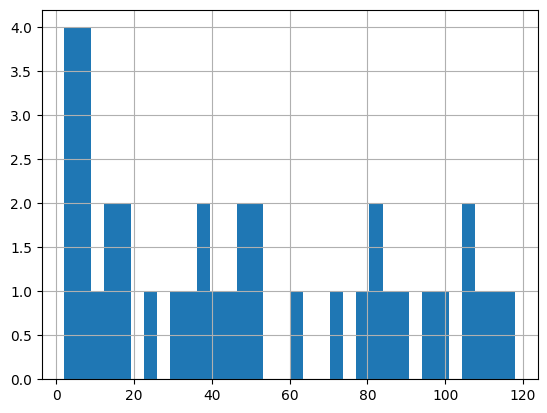

In [ ]:
data.Age.hist(bins=34)

### Boxplot

In [ ]:
data = data_back

<Axes: >

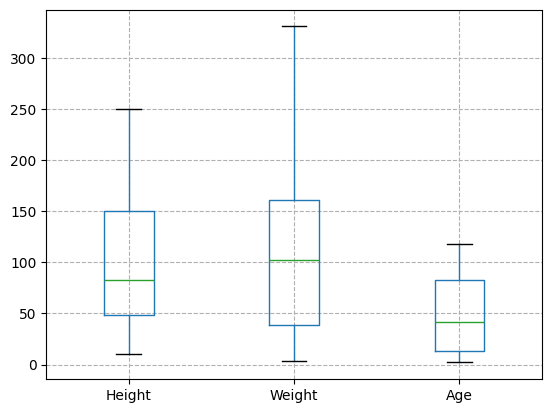

In [ ]:
# sns.boxplot(data.Age)
plt.grid(linestyle='--')
data.boxplot()

### Правило 3 сигм

1$\cdot\sigma$ : 68.27%

2$\cdot\sigma$ : 95.45%

3$\cdot\sigma$ : 99.73%


![](https://drive.google.com/uc?export=view&id=1txTKp88RlBWd9_1j5nk1qwtc7_QQXLUa)

In [ ]:
data[data.Weight < data.Weight.mean() - 3*data.Weight.std()]

,Height,Weight,Age


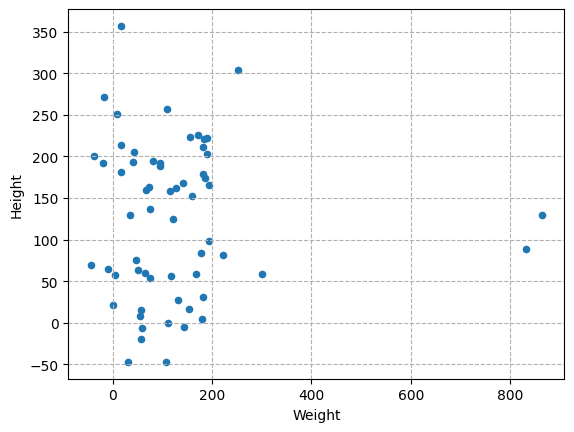

In [ ]:
# d = data[data.Age > data.Age.mean() + data.Age.std()]
data.plot.scatter(x = 'Weight', y = 'Height')
plt.grid(True, linestyle='--')

### Z-score

In [ ]:
np.abs(zscore(data.Weight))

3     0.201069
4     0.092078
5     1.373658
6     0.487827
8     0.326596
9     0.069153
10    1.373658
12    0.215726
16    2.883366
17    1.235353
18    0.391615
19    0.546457
20    0.385226
21    1.030150
22    1.030150
23    0.875308
26    0.136050
28    1.293982
29    0.347643
30    1.323297
31    0.004134
33    2.223785
34    0.810289
35    1.220695
38    0.634401
39    0.699419
40    1.235353
43    0.883576
45    1.256399
46    0.420929
47    1.220695
48    1.344343
49    0.083810
51    0.113125
54    0.655447
55    0.640790
56    0.303670
57    0.370568
58    1.206038
Name: Weight, dtype: float64

In [ ]:
from scipy.stats import zscore

val = np.abs(zscore(data.Weight))
np.where(val > 2)

(array([ 8, 21]),)

In [ ]:
np.where(val > 2)[0]

array([ 8, 21])

In [ ]:
data = data.drop(np.where(val > 2)[0])

### IQR
Inter Quartile Range

In [ ]:
print(data.Weight.quantile(0.01))
print(data.Weight.median())
print(data.Weight.quantile(0.9))

-40.46
109.0
193.0


Text(0.5, 0, 'Index')

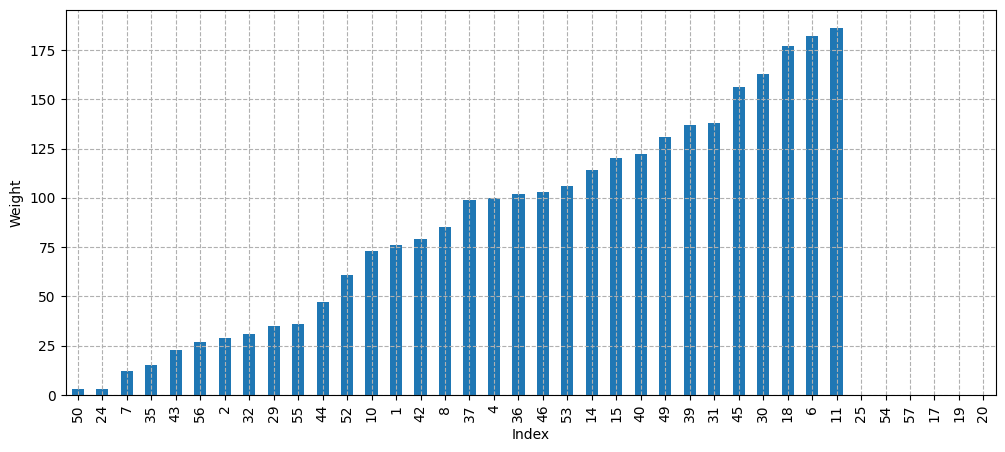

In [ ]:
data.sort_values('Weight', inplace=True)
data.plot(y='Weight', kind='bar', legend=False, figsize=(12,5))
plt.grid(linestyle='--')
plt.ylabel('Weight')
plt.xlabel('Index')

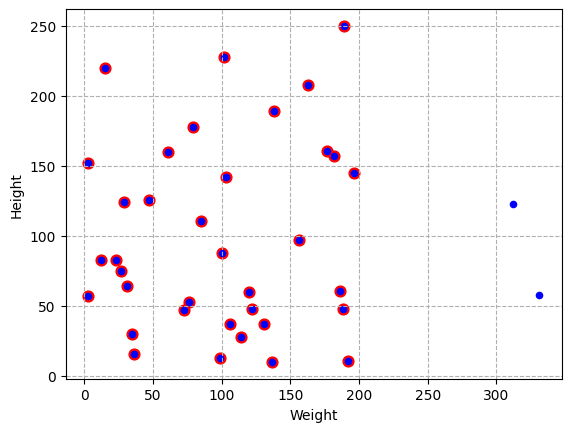

In [ ]:
q1 = data.Age.quantile(0.1)

q3 = data.Age.quantile(0.9)

IQR = q3 - q1

df = data[(data > (q1 - 1.5*IQR)) & (data < (q3 + 1.5*IQR))]


ax = df.plot(kind='scatter', x='Weight', y='Height', color='r', s = 60)
data.plot(kind='scatter', x='Weight', y='Height', color='b', ax=ax, s = 20)
ax.grid(True, linestyle='--')